In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from data_gen import Args, data_gen_decision_tree 
import numpy as np
# from dlgn import trainDLGN
# from lcn import trainLCN
# from latent import trainLatentTree
# from tao import trainTAO
import dlgn
import lcn
import latent
import tao
import kernel

In [16]:
algorithms = [tao.trainTAO]
# algorithms = [kernel.trainSVM, tao.trainTAO]

In [17]:
args = Args()
args.numlayer = 4
args.numnodes = 50
args.beta = 3.
args.lr = 0.001
args.input_dim = 2

In [18]:
for height in [2 ,3, 4]:
    for input_dim in [2, 3, 4]:
        for num_data in [6000, 20000, 100000]:
            for algo in algorithms:
                # num_data = 12000
                seed_set = 0
                seeds = [1234]
                for seed in seeds:
                    ((data_x, labels), (w_list, b_list, vals), stats) = data_gen_decision_tree(
                                                                dim=args.input_dim, seed=seed, num_levels=4,
                                                                num_data=num_data)
                    seed_set=seed

                w_list_old = np.array(w_list)
                b_list_old = np.array(b_list)

                num_data = len(data_x)
                num_train= num_data//2
                num_vali = num_data//4
                num_test = num_data//4
                train_data = data_x[:num_train,:]
                train_data_labels = labels[:num_train]

                vali_data = data_x[num_train:num_train+num_vali,:]
                vali_data_labels = labels[num_train:num_train+num_vali]

                test_data = data_x[num_train+num_vali :,:]
                test_data_labels = labels[num_train+num_vali :] 
                model = algo(args)

                model.train(train_data, train_data_labels, vali_data, vali_data_labels, test_data, test_data_labels, w_list_old=w_list_old, b_list_old=b_list_old)

0.8848674525558149 0.7423035474314879 -0.9340161513391072
0.8856046815898853 1.0006225583207224 -0.5210032898794541
Current height: 6
|--- feature_1 <= -0.76
|   |--- feature_0 <= 0.55
|   |   |--- feature_0 <= 0.25
|   |   |   |--- class: 1.0
|   |   |--- feature_0 >  0.25
|   |   |   |--- feature_1 <= -0.82
|   |   |   |   |--- feature_1 <= -0.86
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_1 >  -0.86
|   |   |   |   |   |--- feature_0 <= 0.45
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_0 >  0.45
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_1 >  -0.82
|   |   |   |   |--- class: 0.0
|   |--- feature_0 >  0.55
|   |   |--- feature_1 <= -0.99
|   |   |   |--- class: 1.0
|   |   |--- feature_1 >  -0.99
|   |   |   |--- feature_0 <= 0.69
|   |   |   |   |--- feature_1 <= -0.91
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_1 >  -0.91
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_0 >  0.6

AttributeError: 'LogisticRegression' object has no attribute 'intercept_'

In [32]:
import matplotlib.pyplot as plt
def visualize(data_x, labels):
    class_0 = data_x[labels == 0]
    class_1 = data_x[labels == 1]

    plt.scatter(class_0[:, 0], class_0[:, 1])
    plt.scatter(class_1[:, 0], class_1[:, 1])
    plt.show()

In [55]:
((data_x, labels), (w_list, b_list, vals), stats) = data_gen_decision_tree(
                                                                dim=2, seed=24, num_levels=4,
                                                                num_data=100000)


0.8947878096697922 0.2912616265742506 -0.0013510494745363768
0.8958114844494788 0.41353283946731384 0.06342538041655948


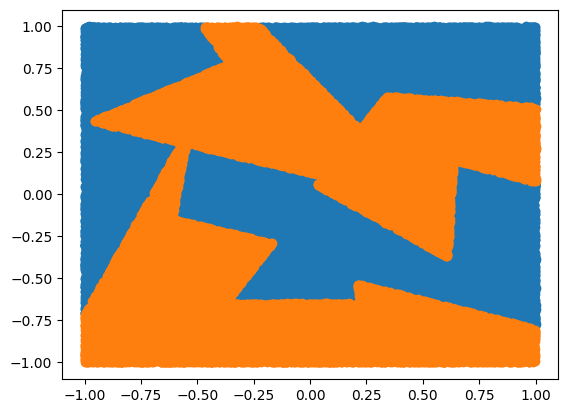

In [56]:
visualize(data_x, labels)